# Machine Learning Algorithms  for Fraud Detection 

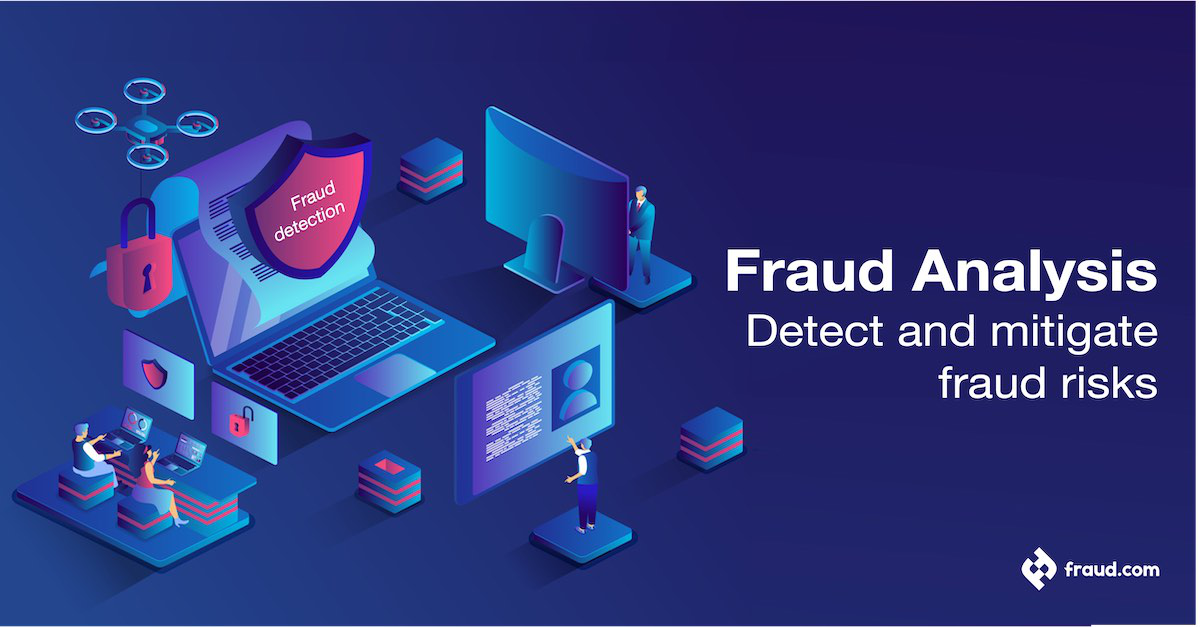

In [1]:
from PIL import Image
Image.open("D:/JAVID_ISMAYILOV_PROF/MB/PYL/proje/fraud_project/Fraud-Analysis.jpg")

Fraud refers to deceptive, illegal activities designed to gain unfair advantages or financial benefits. It can involve identity theft, credit card fraud, tax evasion, and more. Fraud detection systems, often employing machine learning, analyze data for abnormal patterns or behaviors to identify and prevent such illicit activities, safeguarding individuals and organizations.

Required modules

In [2]:
import pandas as pd
import numpy  as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from collections import Counter
from sklearn.metrics import  classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Extract Data
path='D:/JAVID_ISMAYILOV_PROF/MB/PYL/proje/fraud_project/creditcard.csv'
fraud_df=pd.read_csv(path)



The dataset contains 31 numerical features. Since some of the input variables contains financial information, the PCA transformation of these input variables were performed in order to keep these data anonymous.


In [4]:
fraud_df.shape

(284807, 31)

In [5]:
fraud_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
fraud_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#########

Pie chart Fraud and Non Fraud before resampling

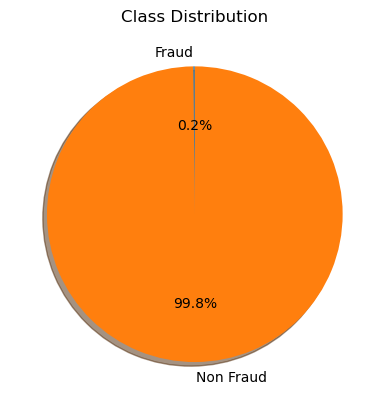

In [9]:
######Pie chart Fraud and Non_Fraud
a=fraud_df['Class'].value_counts()[1]/len(fraud_df['Class'].values)
sizes=[a,(1-a)]
labels=['Fraud', 'Non Fraud']
plt.pie(sizes, labels=labels,  startangle=90,autopct='%1.1f%%', shadow=True)
plt.title('Class Distribution')
plt.show()

In [10]:
y=fraud_df['Class'].values
X=fraud_df.loc[:, fraud_df.columns != 'Class'].values

SMOTE is a technique to address class imbalance by generating synthetic samples in the minority class using nearest neighbor interpolation.

In [11]:
smote = SMOTE(sampling_strategy='auto', random_state=24)
X_resampled, y_resampled = smote.fit_resample(X, y)

Pie chart Fraud and Non Fraud After Resampling

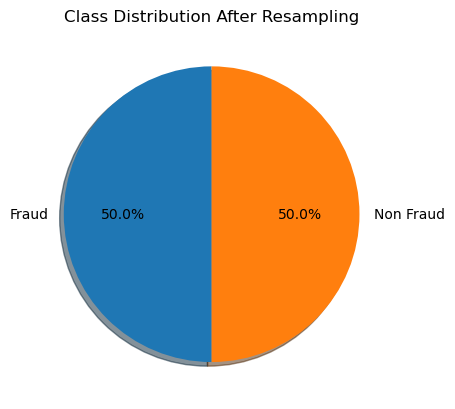

In [12]:
a=Counter(y_resampled)[0]/(len(y_resampled))
sizes=[a,(1-a)]
labels=['Fraud', 'Non Fraud']
plt.pie(sizes, labels=labels,  startangle=90,autopct='%1.1f%%', shadow=True)
plt.title('Class Distribution After Resampling')
plt.show()

In [13]:
#####Train test Split
X_tr, X_tst, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,
                                                    stratify=y_resampled)
###Min Max Scaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_tr)
X_test=scaler.transform(X_tst)

# Lojistic Regression

Accuracy: 0.9790900937340625
Precision: 0.9907939539157223
Recall: 0.9671666989079014
F1-Score: 0.9788377680875678
Confusion Matrix:
 [[56352   511]
 [ 1867 54996]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



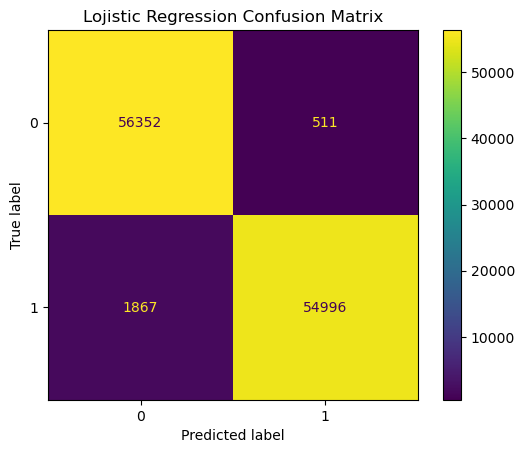

In [14]:
####Lojistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)
# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_confusion = confusion_matrix(y_test, lr_pred)
lr_report=classification_report(y_test, lr_pred)
# Print the results
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-Score:", lr_f1)
print("Confusion Matrix:\n", lr_confusion)
print("Classification Report:\n", lr_report)
plot_confusion_matrix(lr, X_test, y_test)
plt.title('Lojistic Regression Confusion Matrix')
plt.show()

Decision Tree Classification

Accuracy: 0.9983732831542479
Precision: 0.9977867556648515
Recall: 0.9989624184443311
F1-Score: 0.9983742409462796
Confusion Matrix:
 [[56737   126]
 [   59 56804]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56863
           1       0.99      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



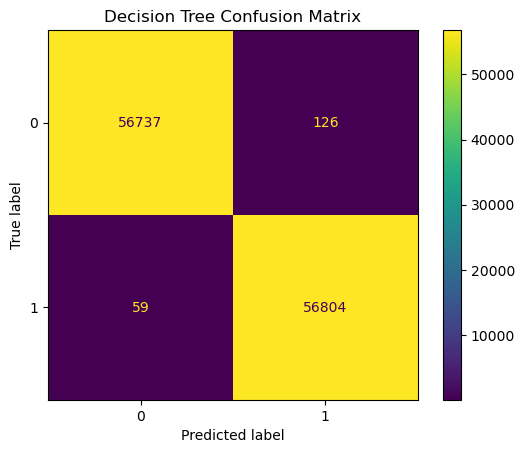

In [15]:
###########Decision Tree
tree = DecisionTreeClassifier(random_state=24)
tree.fit(X_train, y_train)
tree_pred=tree.predict(X_test)
# Calculate evaluation metrics
tree_accuracy = accuracy_score(y_test,tree_pred)
tree_precision = precision_score(y_test, tree_pred)
tree_recall = recall_score(y_test, tree_pred)
tree_f1 = f1_score(y_test, tree_pred)
tree_confusion = confusion_matrix(y_test, tree_pred)
tree_report=classification_report(y_test, lr_pred)
# Print the results
print("Accuracy:", tree_accuracy)
print("Precision:", tree_precision)
print("Recall:", tree_recall)
print("F1-Score:", tree_f1)
print("Confusion Matrix:\n", tree_confusion)
print("Classification Report:\n", tree_report)
plot_confusion_matrix(tree, X_test, y_test)
plt.title('Decision Tree Confusion Matrix')
plt.show()

# K-Nearest Neighbors Algorithm

Accuracy: 0.9997801733992226
Precision: 0.9995605400084376
Recall: 1.0
F1-Score: 0.9983742409462796
Confusion Matrix:
 [[56838    25]
 [    0 56863]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



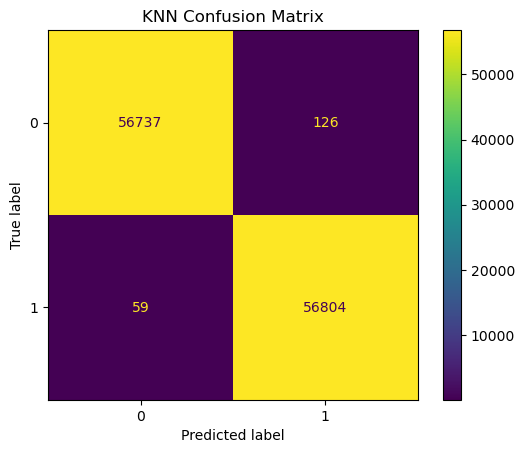

In [19]:
#KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)
# Calculate evaluation metrics
knn_accuracy = accuracy_score(y_test,knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, tree_pred)
knn_confusion = confusion_matrix(y_test, knn_pred)
knn_report=classification_report(y_test, knn_pred)
# Print the results
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-Score:", knn_f1)
print("Confusion Matrix:\n", knn_confusion)
print("Classification Report:\n", knn_report)
plot_confusion_matrix(tree, X_test, y_test)
plt.title('KNN Confusion Matrix')
plt.show()

# Gaussian Naive Bayes

Accuracy: 0.9235091359935284
Precision: 0.97323534035529
Recall: 0.8709705784077519
F1-Score: 0.919267570602593
Confusion Matrix:
 [[55501  1362]
 [ 7337 49526]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     56863
           1       0.97      0.87      0.92     56863

    accuracy                           0.92    113726
   macro avg       0.93      0.92      0.92    113726
weighted avg       0.93      0.92      0.92    113726



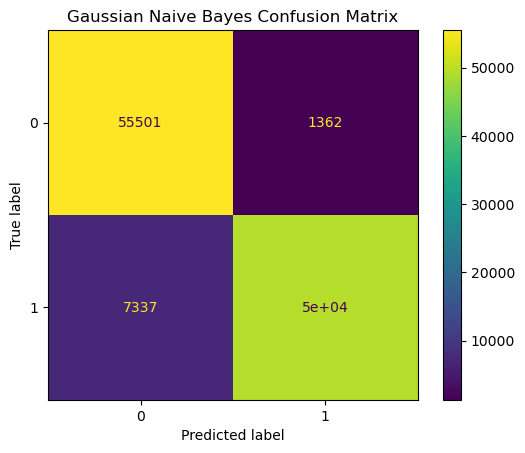

In [16]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred=nb.predict(X_test)
# Calculate evaluation metrics
nb_accuracy = accuracy_score(y_test,nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
nb_confusion = confusion_matrix(y_test, nb_pred)
nb_report=classification_report(y_test, nb_pred)
# Print the results
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-Score:", nb_f1)
print("Confusion Matrix:\n", nb_confusion)
print("Classification Report:\n", nb_report)
plot_confusion_matrix(nb, X_test, y_test)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

# Super Vector Machine

Accuracy: 0.9856497195012575
Precision: 0.9947684314252441
Recall: 0.9764345883966727
F1-Score: 0.9855162498446902
Confusion Matrix:
 [[56571   292]
 [ 1340 55523]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     56863
           1       0.97      0.87      0.92     56863

    accuracy                           0.92    113726
   macro avg       0.93      0.92      0.92    113726
weighted avg       0.93      0.92      0.92    113726



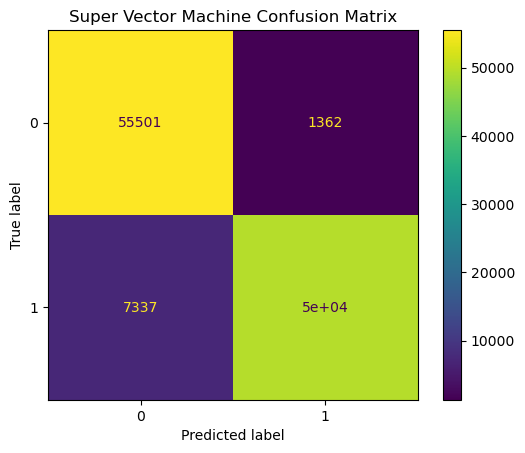

In [18]:
##Super Vector Machine
svc=SVC()
svc.fit(X_train, y_train)
svc_pred=svc.predict(X_test)
# Calculate evaluation metrics
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
svc_confusion = confusion_matrix(y_test, svc_pred)
svc_report=classification_report(y_test, nb_pred)
# Print the results
print("Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("F1-Score:", svc_f1)
print("Confusion Matrix:\n", svc_confusion)
print("Classification Report:\n", svc_report)
plot_confusion_matrix(nb, X_test, y_test)
plt.title('Super Vector Machine Confusion Matrix')
plt.show()

# Random Forest Classifer

Accuracy: 0.999815345655347
Precision: 0.999683533176272
Recall: 0.9999472416158135
F1-Score: 0.9998153700072974
Confusion Matrix:
 [[56845    18]
 [    3 56860]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



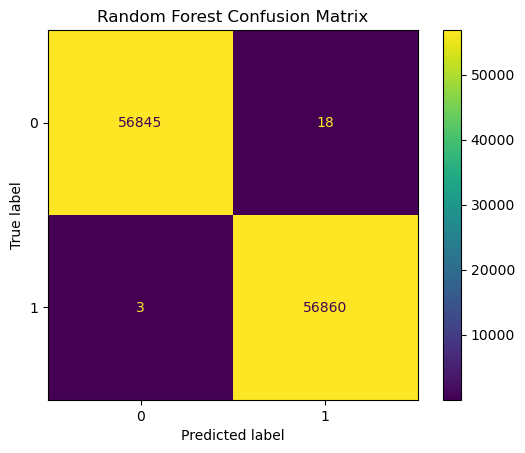

In [17]:
#Random forest Classifer
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

# Print the results
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)
print("Confusion Matrix:\n", rf_confusion)
print("Classification Report:\n", rf_report)
plot_confusion_matrix(rf_classifier, X_test, y_test)
plt.title('Random Forest Confusion Matrix')
plt.show()